In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
import random
# import openweathermap as owm




# Import API key
import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [38]:
# List for holding lat_lngs and cities
lat_lng = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


627

In [39]:
# get list of cities
for i in range(len(lats)):
        city = citipy.nearest_city(lats[i], lngs[i])
        cities.append(city.city_name)

# remove duplicates
print('Before: ' + str(len(cities)))
before = len(cities)
cities = list(set(cities))
print('After: ' + str(len(cities)))
after = len(cities)
print('Removed ' + str(before - after) + ' duplicates')

print(str(len(cities)) + ' unique cities found!')

Before: 2127
After: 627
Removed 1500 duplicates
627 unique cities found!


## Perform API Calls

In [40]:
print(cities)

['atbasar', 'dembi dolo', 'lapua', 'ilhabela', 'khilok', 'la asuncion', 'la tuque', 'rikitea', 'zhigansk', 'aquiraz', 'los llanos de aridane', 'talcahuano', 'pozo colorado', 'pulivendla', 'kavaratti', 'alamogordo', 'aksha', 'arman', 'turkistan', 'otradnoye', 'rauma', 'orocue', 'shimoda', 'palauig', 'kutum', 'bonthe', 'asau', 'coquimbo', 'torbay', 'rosarito', 'antsla', 'tual', 'maragogi', 'kouqian', 'comodoro rivadavia', 'formoso do araguaia', 'linxia', 'hermanus', 'prince rupert', 'alekseyevsk', 'una', 'alta', 'ahipara', 'pedernales', 'katsuura', 'goderich', 'la ronge', 'cumra', 'chapais', 'marcona', 'borogontsy', 'puerto narino', 'warrensburg', 'gorontalo', 'khonuu', 'ribeira grande', 'port elizabeth', 'camacha', 'kaitangata', 'hobart', 'berlevag', 'bazarnyye mataki', 'northam', 'kindu', 'jutiapa', 'georgetown', 'thompson', 'yerbogachen', 'gugesti', 'isangel', 'cherskiy', 'alofi', 'mentok', 'attawapiskat', 'saint-philippe', 'adrar', 'ksenyevka', 'bluff', 'morgan city', 'klaksvik', 'sa

In [41]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=


In [42]:
temps = []
humidity = []
clouds = []
wind = []
city_lat = []
city_lng = []
completed_cities = []

In [43]:
for city in cities:
    city = city.replace(" ", "")
    city_url = url + city
    
    print(city_url)
    # get city weather data
    time.sleep(0.02)
    print('Working on city: ' + city)
    try:
        # Build query URL
        test = req.get(city_url).json()
        print(test)

        temps.append(test['main']['temp'])
        humidity.append(test['main']['humidity'])
        clouds.append(test['clouds']['all'])
        wind.append(test['wind']['speed'])
        city_lat.append(test['coord']['lat'])
        city_lng.append(test['coord']['lon'])
        completed_cities.append(city)
    except:
        print('City not found')
        continue


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=atbasar
Working on city: atbasar
{'coord': {'lon': 68.36, 'lat': 51.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 61.38, 'pressure': 997.43, 'humidity': 56, 'temp_min': 61.38, 'temp_max': 61.38, 'sea_level': 1033.56, 'grnd_level': 997.43}, 'wind': {'speed': 9.91, 'deg': 274.502}, 'clouds': {'all': 20}, 'dt': 1536975553, 'sys': {'message': 0.0092, 'country': 'KZ', 'sunrise': 1536973248, 'sunset': 1537018910}, 'id': 1526038, 'name': 'Atbasar', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=dembidolo
Working on city: dembidolo
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=lapua
Working on city: lapua
{'coord': {'lon': 23.01,

{'coord': {'lon': 113.29, 'lat': 50.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 53.82, 'pressure': 921.64, 'humidity': 50, 'temp_min': 53.82, 'temp_max': 53.82, 'sea_level': 1027.31, 'grnd_level': 921.64}, 'wind': {'speed': 13.82, 'deg': 284.502}, 'clouds': {'all': 20}, 'dt': 1536975556, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 1536962515, 'sunset': 1537008086}, 'id': 2028028, 'name': 'Aksha', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=arman
Working on city: arman
{'coord': {'lon': 150.17, 'lat': 59.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1007, 'humidity': 50, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 6.71, 'deg': 250}, 'clouds': {'all': 0}, 'dt': 1536973200, 'sys': {'type': 1, 'i

{'coord': {'lon': 132.75, 'lat': -5.67}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.56, 'pressure': 1024.35, 'humidity': 100, 'temp_min': 79.56, 'temp_max': 79.56, 'sea_level': 1024.84, 'grnd_level': 1024.35}, 'wind': {'speed': 9.57, 'deg': 138.002}, 'clouds': {'all': 76}, 'dt': 1536975559, 'sys': {'message': 0.017, 'country': 'ID', 'sunrise': 1536958940, 'sunset': 1537002386}, 'id': 1623197, 'name': 'Tual', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=maragogi
Working on city: maragogi
{'coord': {'lon': -35.22, 'lat': -9.01}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 71.82, 'pressure': 1018.83, 'humidity': 100, 'temp_min': 71.82, 'temp_max': 71.82, 'sea_level': 1027.6, 'grnd_level': 1018.83}, 'wind': {'speed': 7.34, 'deg': 128.002}, 'rain': {'3h': 1.

{'coord': {'lon': 32.77, 'lat': 37.57}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 1018, 'humidity': 67, 'temp_min': 59, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 80}, 'clouds': {'all': 0}, 'dt': 1536972600, 'sys': {'type': 1, 'id': 6033, 'message': 0.0042, 'country': 'TR', 'sunrise': 1536982240, 'sunset': 1537027023}, 'id': 317844, 'name': 'Cumra', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=chapais
Working on city: chapais
{'coord': {'lon': -74.86, 'lat': 49.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1019, 'humidity': 77, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 14484, 'wind': {'speed': 4.7, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 3777, 'messa

{'coord': {'lon': -89.9, 'lat': 14.29}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 63.18, 'pressure': 890.03, 'humidity': 98, 'temp_min': 63.18, 'temp_max': 63.18, 'sea_level': 1025.17, 'grnd_level': 890.03}, 'wind': {'speed': 1.5, 'deg': 76.0022}, 'rain': {'3h': 5.355}, 'clouds': {'all': 100}, 'dt': 1536975568, 'sys': {'message': 0.0034, 'country': 'GT', 'sunrise': 1537012104, 'sunset': 1537056051}, 'id': 3595069, 'name': 'Jutiapa', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=georgetown
Working on city: georgetown
{'coord': {'lon': -58.16, 'lat': 6.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1010, 'humidity': 94, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 60}, 'clouds': {'all': 0}, 'dt': 15369732

{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=khatanga
Working on city: khatanga
{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 42.12, 'pressure': 1022.56, 'humidity': 88, 'temp_min': 42.12, 'temp_max': 42.12, 'sea_level': 1027.19, 'grnd_level': 1022.56}, 'wind': {'speed': 4.76, 'deg': 18.5022}, 'clouds': {'all': 0}, 'dt': 1536975211, 'sys': {'message': 0.0027, 'country': 'RU', 'sunrise': 1536963350, 'sunset': 1537012338}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=klamathfalls
Working on city: klamathfalls
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728

{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=lagunas
Working on city: lagunas
{'coord': {'lon': -75.68, 'lat': -5.23}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 77.67, 'pressure': 1001.16, 'humidity': 91, 'temp_min': 77.67, 'temp_max': 77.67, 'sea_level': 1021.07, 'grnd_level': 1001.16}, 'wind': {'speed': 1.5, 'deg': 10.5022}, 'clouds': {'all': 92}, 'dt': 1536975574, 'sys': {'message': 0.0042, 'country': 'PE', 'sunrise': 1537008940, 'sunset': 1537052407}, 'id': 3695844, 'name': 'Lagunas', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=champerico
Working on city: champerico
{'coord': {'lon': -93.6, 'lat': 16.38}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.37, 'pressure': 992.81, 'humidity': 100, 'temp_min': 26.37, 'temp_max': 26.37, 'sea_level': 1025.13, 'grnd_level': 992.81}, 'wind': {'speed': 4.88, 'deg': 131.502}, 'clouds': {'all': 88}, 'dt': 1536975185, 'sys': {'message': 0.0033, 'country': 'GL', 'sunrise': 1537003380, 'sunset': 1537054671}, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=emba
Working on city: emba
{'coord': {'lon': 32.42, 'lat': 34.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 72.09, 'pressure': 1012, 'humidity': 77, 'temp_min': 69.8, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1536975000, 'sys': 

{'coord': {'lon': 17.88, 'lat': -29.67}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 35.46, 'pressure': 925.21, 'humidity': 74, 'temp_min': 35.46, 'temp_max': 35.46, 'sea_level': 1030.56, 'grnd_level': 925.21}, 'wind': {'speed': 3.2, 'deg': 143.002}, 'clouds': {'all': 44}, 'dt': 1536975580, 'sys': {'message': 0.0035, 'country': 'ZA', 'sunrise': 1536986812, 'sunset': 1537029660}, 'id': 3361142, 'name': 'Springbok', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=saofelixdoxingu
Working on city: saofelixdoxingu
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=ambon
Working on city: ambon
{'coord': {'lon': -2.56, 'lat': 47.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stati

{'coord': {'lon': 124.11, 'lat': 42.78}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 55.17, 'pressure': 1010.97, 'humidity': 99, 'temp_min': 55.17, 'temp_max': 55.17, 'sea_level': 1032.26, 'grnd_level': 1010.97}, 'wind': {'speed': 8.9, 'deg': 338.002}, 'rain': {'3h': 1.335}, 'clouds': {'all': 100}, 'dt': 1536975582, 'sys': {'message': 0.0034, 'country': 'CN', 'sunrise': 1536960167, 'sunset': 1537005256}, 'id': 2038139, 'name': 'Changtu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=stornoway
Working on city: stornoway
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=riyadh
Working on city: riyadh
{'coord': {'lon': 46.72, 'lat': 24.63}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 

{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.7, 'pressure': 1020.29, 'humidity': 100, 'temp_min': 83.7, 'temp_max': 83.7, 'sea_level': 1020.26, 'grnd_level': 1020.29}, 'wind': {'speed': 9.69, 'deg': 102.002}, 'clouds': {'all': 68}, 'dt': 1536975197, 'sys': {'message': 0.0029, 'country': 'KI', 'sunrise': 1536949217, 'sunset': 1536992887}, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=amderma
Working on city: amderma
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=victoria
Working on city: victoria
{'coord': {'lon': 115.24, 'lat': 5.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', '

{'coord': {'lon': 112.4, 'lat': 66.42}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 42.39, 'pressure': 973.6, 'humidity': 74, 'temp_min': 42.39, 'temp_max': 42.39, 'sea_level': 1024.27, 'grnd_level': 973.6}, 'wind': {'speed': 3.31, 'deg': 83.0022}, 'rain': {'3h': 0.115}, 'clouds': {'all': 64}, 'dt': 1536975588, 'sys': {'message': 0.004, 'country': 'RU', 'sunrise': 1536961713, 'sunset': 1537009256}, 'id': 2014624, 'name': 'Udachnyy', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=verkhnyayamaksakovka
Working on city: verkhnyayamaksakovka
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=kungurtug
Working on city: kungurtug
{'coord': {'lon': 97.53, 'lat': 50.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', '

{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.69, 'pressure': 1024.1, 'humidity': 98, 'temp_min': 39.69, 'temp_max': 39.69, 'sea_level': 1026.18, 'grnd_level': 1024.1}, 'wind': {'speed': 12.82, 'deg': 15.5022}, 'rain': {'3h': 1.075}, 'clouds': {'all': 92}, 'dt': 1536975246, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1536952639, 'sunset': 1537001262}, 'id': 2126123, 'name': 'Chokurdakh', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=boavista
Working on city: boavista
{'coord': {'lon': 13.26, 'lat': -8.8}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1014, 'humidity': 88, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 8000, 'wind': {'speed': 5.82, 'deg': 210}, 'clouds': {'all': 75}, 'dt'

{'coord': {'lon': -96.99, 'lat': 50.56}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 55.71, 'pressure': 1008.13, 'humidity': 90, 'temp_min': 55.71, 'temp_max': 55.71, 'sea_level': 1037.89, 'grnd_level': 1008.13}, 'wind': {'speed': 11.81, 'deg': 31.0022}, 'clouds': {'all': 92}, 'dt': 1536975262, 'sys': {'message': 0.0038, 'country': 'CA', 'sunrise': 1537013024, 'sunset': 1537058486}, 'id': 5961417, 'name': 'Husavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=kidal
Working on city: kidal
{'coord': {'lon': 1.41, 'lat': 18.44}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 72.9, 'pressure': 970.19, 'humidity': 33, 'temp_min': 72.9, 'temp_max': 72.9, 'sea_level': 1023.22, 'grnd_level': 970.19}, 'wind': {'speed': 5.32, 'deg': 113.502}, 'clouds': {'all': 0}, 'd

{'coord': {'lon': -81.24, 'lat': 32.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 84.15, 'pressure': 1009, 'humidity': 61, 'temp_min': 82.4, 'temp_max': 86}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 320}, 'clouds': {'all': 1}, 'dt': 1536974100, 'sys': {'type': 1, 'id': 797, 'message': 0.0034, 'country': 'US', 'sunrise': 1537009730, 'sunset': 1537054251}, 'id': 4218882, 'name': 'Rincon', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=kapaa
Working on city: kapaa
{'coord': {'lon': -159.32, 'lat': 22.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 82.67, 'pressure': 1016, 'humidity': 81, 'temp_min': 80.06, 'temp_max': 84.92}, 'visibility': 16093, 'wind': {'speed': 14.99, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1536972960, 'sys': {'type': 1, 'id':

{'coord': {'lon': 38.78, 'lat': -7.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1015, 'humidity': 94, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 217.002}, 'clouds': {'all': 20}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 6482, 'message': 0.004, 'country': 'TZ', 'sunrise': 1536981504, 'sunset': 1537024918}, 'id': 154915, 'name': 'Maneromango', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=hongan
Working on city: hongan
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=sungaipenuh
Working on city: sungaipenuh
{'coord': {'lon': 101.38, 'lat': -2.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'t

{'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1023, 'humidity': 74, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 24140, 'wind': {'speed': 11.41, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 3558, 'message': 0.0051, 'country': 'CA', 'sunrise': 1537016593, 'sunset': 1537063225}, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=ozinki
Working on city: ozinki
{'coord': {'lon': 49.73, 'lat': 51.2}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 55.17, 'pressure': 1021.99, 'humidity': 56, 'temp_min': 55.17, 'temp_max': 55.17, 'sea_level': 1032.06, 'grnd_level': 1021.99}, 'wind': {'speed': 5.77, 'deg': 118.502}, 'clouds': {'all': 20}, 

{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=upernavik
Working on city: upernavik
{'coord': {'lon': -56.15, 'lat': 72.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.37, 'pressure': 1022.24, 'humidity': 100, 'temp_min': 35.37, 'temp_max': 35.37, 'sea_level': 1025.33, 'grnd_level': 1022.24}, 'wind': {'speed': 4.65, 'deg': 349.502}, 'clouds': {'all': 68}, 'dt': 1536975187, 'sys': {'message': 0.003, 'country': 'GL', 'sunrise': 1537001395, 'sunset': 1537050403}, 'id': 3418910, 'name': 'Upernavik', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=dolbeau
Working on city: dolbeau
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728c

{'coord': {'lon': 111.51, 'lat': 32.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.98, 'pressure': 1004.73, 'humidity': 82, 'temp_min': 73.98, 'temp_max': 73.98, 'sea_level': 1029.79, 'grnd_level': 1004.73}, 'wind': {'speed': 3.98, 'deg': 348.502}, 'clouds': {'all': 80}, 'dt': 1536975609, 'sys': {'message': 0.0046, 'country': 'CN', 'sunrise': 1536963445, 'sunset': 1537008038}, 'id': 1813828, 'name': 'Danjiangkou', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=bubaque
Working on city: bubaque
{'coord': {'lon': -15.83, 'lat': 11.28}, 'weather': [{'id': 211, 'main': 'Thunderstorm', 'description': 'thunderstorm', 'icon': '11n'}], 'base': 'stations', 'main': {'temp': 73.4, 'pressure': 1012, 'humidity': 100, 'temp_min': 73.4, 'temp_max': 73.4}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 40}, 'dt': 1536973200, 'sys':

{'coord': {'lon': 43.89, 'lat': 4.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 68.94, 'pressure': 965.74, 'humidity': 93, 'temp_min': 68.94, 'temp_max': 68.94, 'sea_level': 1026.46, 'grnd_level': 965.74}, 'wind': {'speed': 10.02, 'deg': 186.002}, 'clouds': {'all': 12}, 'dt': 1536975612, 'sys': {'message': 0.0031, 'country': 'SO', 'sunrise': 1536980134, 'sunset': 1537023827}, 'id': 49747, 'name': 'Xuddur', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=mandal
Working on city: mandal
{'coord': {'lon': 106.5, 'lat': 48.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 49.77, 'pressure': 877.95, 'humidity': 46, 'temp_min': 49.77, 'temp_max': 49.77, 'sea_level': 1033.6, 'grnd_level': 877.95}, 'wind': {'speed': 10.02, 'deg': 254.002}, 'clouds': {'all': 0}, 'dt': 15

{'coord': {'lon': 122.42, 'lat': 37.16}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 73.35, 'pressure': 1024.51, 'humidity': 96, 'temp_min': 73.35, 'temp_max': 73.35, 'sea_level': 1029.02, 'grnd_level': 1024.51}, 'wind': {'speed': 5.66, 'deg': 13.5022}, 'rain': {'3h': 0.31}, 'clouds': {'all': 92}, 'dt': 1536975615, 'sys': {'message': 0.0034, 'country': 'CN', 'sunrise': 1536960721, 'sunset': 1537005521}, 'id': 1786855, 'name': 'Rongcheng', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=strelka
Working on city: strelka
{'coord': {'lon': 93.03, 'lat': 58.08}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 49.86, 'pressure': 992.57, 'humidity': 99, 'temp_min': 49.86, 'temp_max': 49.86, 'sea_level': 1016.37, 'grnd_level': 992.57}, 'wind': {'speed': 7, 'deg': 224.002}, 'ra

{'coord': {'lon': 20.71, 'lat': 41.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1020, 'humidity': 87, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 340}, 'clouds': {'all': 20}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 6089, 'message': 0.0033, 'country': 'MK', 'sunrise': 1536985043, 'sunset': 1537030002}, 'id': 787487, 'name': 'Poum', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=rawannawi
Working on city: rawannawi
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=jishou
Working on city: jishou
{'coord': {'lon': 109.7, 'lat': 28.26}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.38,

{'coord': {'lon': 51.16, 'lat': 43.65}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1016, 'humidity': 13, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 10000, 'wind': {'speed': 15.66, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 7207, 'message': 0.0032, 'country': 'KZ', 'sunrise': 1536977663, 'sunset': 1537022766}, 'id': 610612, 'name': 'Aktau', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=faya
Working on city: faya
{'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1023, 'humidity': 45, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 2.64, 'deg': 18.0022}, 'clouds': {'all': 0}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 6975, 'message

{'coord': {'lon': 80.43, 'lat': 47.96}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.31, 'pressure': 950.5, 'humidity': 72, 'temp_min': 50.31, 'temp_max': 50.31, 'sea_level': 1036.47, 'grnd_level': 950.5}, 'wind': {'speed': 4.54, 'deg': 42.0022}, 'clouds': {'all': 0}, 'dt': 1536975625, 'sys': {'message': 0.0048, 'country': 'KZ', 'sunrise': 1536970495, 'sunset': 1537015880}, 'id': 1525988, 'name': 'Ayagoz', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=ustka
Working on city: ustka
{'coord': {'lon': 16.86, 'lat': 54.58}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 57.51, 'pressure': 1027.83, 'humidity': 99, 'temp_min': 57.51, 'temp_max': 57.51, 'sea_level': 1029.62, 'grnd_level': 1027.83}, 'wind': {'speed': 13.82, 'deg': 227.002}, 'clouds': {'all': 76}, 'dt'

{'coord': {'lon': 176.76, 'lat': -37.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 58.77, 'pressure': 1036.5, 'humidity': 98, 'temp_min': 58.77, 'temp_max': 58.77, 'sea_level': 1038.42, 'grnd_level': 1036.5}, 'wind': {'speed': 9.46, 'deg': 38.5022}, 'clouds': {'all': 0}, 'dt': 1536975627, 'sys': {'message': 0.0034, 'country': 'NZ', 'sunrise': 1536948850, 'sunset': 1536991388}, 'id': 2187175, 'name': 'Matata', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=nurobod
Working on city: nurobod
{'coord': {'lon': 69.8, 'lat': 40.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1018, 'humidity': 50, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 70}, 'clouds': {'all': 0}, 'dt': 1536973200, 'sys': {'type': 1, 'id

{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=lavrentiya
Working on city: lavrentiya
{'coord': {'lon': -170.99, 'lat': 65.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 48.96, 'pressure': 1017.05, 'humidity': 93, 'temp_min': 48.96, 'temp_max': 48.96, 'sea_level': 1021.03, 'grnd_level': 1017.05}, 'wind': {'speed': 13.71, 'deg': 135.002}, 'rain': {'3h': 1.355}, 'clouds': {'all': 92}, 'dt': 1536975194, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1537029956, 'sunset': 1537077013}, 'id': 4031637, 'name': 'Lavrentiya', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=conceicaodoaraguaia
Working on city: conceicaodoaraguaia
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/wea

{'coord': {'lon': 14.07, 'lat': 66.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 35.46, 'pressure': 954.87, 'humidity': 96, 'temp_min': 35.46, 'temp_max': 35.46, 'sea_level': 1014.3, 'grnd_level': 954.87}, 'wind': {'speed': 1.95, 'deg': 100.002}, 'rain': {'3h': 0.19}, 'clouds': {'all': 80}, 'dt': 1536975634, 'sys': {'message': 0.0036, 'country': 'NO', 'sunrise': 1536985379, 'sunset': 1537032778}, 'id': 3153517, 'name': 'Hauknes', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=bardiyah
Working on city: bardiyah
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=amtiman
Working on city: amtiman
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e2

{'coord': {'lon': 135.8, 'lat': 34.68}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 78.78, 'pressure': 1014, 'humidity': 74, 'temp_min': 77, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 75}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 7589, 'message': 0.0056, 'country': 'JP', 'sunrise': 1536957566, 'sunset': 1537002258}, 'id': 1855612, 'name': 'Nara', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=dongsheng
Working on city: dongsheng
{'coord': {'lon': 112.52, 'lat': 29.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 86.31, 'pressure': 1022.89, 'humidity': 71, 'temp_min': 86.31, 'temp_max': 86.31, 'sea_level': 1026.3, 'grnd_level': 1022.89}, 'wind': {'speed': 10.25, 'deg': 26.5022}, 'clouds': {'all': 8}, 'dt': 

{'coord': {'lon': 20.51, 'lat': 49.81}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1018, 'humidity': 100, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1536975000, 'sys': {'type': 1, 'id': 5352, 'message': 0.0041, 'country': 'PL', 'sunrise': 1536984823, 'sunset': 1537030302}, 'id': 775758, 'name': 'Mulki', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=umzimvubu
Working on city: umzimvubu
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=hovd
Working on city: hovd
{'coord': {'lon': 10.7, 'lat': 63.83}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.8, 'pr

{'coord': {'lon': 44.22, 'lat': 17.54}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1014, 'humidity': 25, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 10000, 'wind': {'speed': 2.98, 'deg': 140.002}, 'clouds': {'all': 0}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 6998, 'message': 0.0036, 'country': 'SA', 'sunrise': 1536979866, 'sunset': 1537023925}, 'id': 103630, 'name': 'Najran', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=krasnousolskiy
Working on city: krasnousolskiy
{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=lumphat
Working on city: lumphat
{'coord': {'lon': 106.97, 'lat': 13.5}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main

{'coord': {'lon': 84.89, 'lat': 55.79}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 56.43, 'pressure': 1000.67, 'humidity': 80, 'temp_min': 56.43, 'temp_max': 56.43, 'sea_level': 1020.99, 'grnd_level': 1000.67}, 'wind': {'speed': 13.38, 'deg': 249.002}, 'clouds': {'all': 64}, 'dt': 1536975645, 'sys': {'message': 0.0286, 'country': 'RU', 'sunrise': 1536969095, 'sunset': 1537015121}, 'id': 1485724, 'name': 'Talaya', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=opuwo
Working on city: opuwo
{'coord': {'lon': 13.84, 'lat': -18.06}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 47.7, 'pressure': 885.97, 'humidity': 68, 'temp_min': 47.7, 'temp_max': 47.7, 'sea_level': 1028.89, 'grnd_level': 885.97}, 'wind': {'speed': 3.76, 'deg': 223.502}, 'clouds': {'all': 0}, 'dt'

{'coord': {'lon': 35.82, 'lat': 37.03}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.01, 'pressure': 1011, 'humidity': 88, 'temp_min': 66.2, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 360}, 'clouds': {'all': 40}, 'dt': 1536972600, 'sys': {'type': 1, 'id': 6026, 'message': 0.0207, 'country': 'TR', 'sunrise': 1536981520, 'sunset': 1537026280}, 'id': 318675, 'name': 'Ceyhan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=ilulissat
Working on city: ilulissat
{'coord': {'lon': -51.1, 'lat': 69.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1011, 'humidity': 69, 'temp_min': 33.8, 'temp_max': 33.8}, 'wind': {'speed': 3.65, 'deg': 101.502}, 'clouds': {'all': 76}, 'dt': 1536972600, 'sys': {'type': 1, 'id': 480

{'coord': {'lon': 32.69, 'lat': 41.25}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 58.86, 'pressure': 966.47, 'humidity': 100, 'temp_min': 58.86, 'temp_max': 58.86, 'sea_level': 1028.08, 'grnd_level': 966.47}, 'wind': {'speed': 1.95, 'deg': 220.002}, 'rain': {'3h': 6.36}, 'clouds': {'all': 92}, 'dt': 1536975651, 'sys': {'message': 0.0151, 'country': 'TR', 'sunrise': 1536982166, 'sunset': 1537027130}, 'id': 740430, 'name': 'Safranbolu', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=faanui
Working on city: faanui
{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 80.37, 'pressure': 1027.02, 'humidity': 99, 'temp_min': 80.37, 'temp_max': 80.37, 'sea_level': 1027.19, 'grnd_level': 1027.02}, 'wind': {'speed': 15.61, 'deg': 101.5

{'coord': {'lon': 13.8, 'lat': 10.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 66.69, 'pressure': 949.52, 'humidity': 92, 'temp_min': 66.69, 'temp_max': 66.69, 'sea_level': 1024.07, 'grnd_level': 949.52}, 'wind': {'speed': 2.42, 'deg': 267.502}, 'clouds': {'all': 8}, 'dt': 1536975654, 'sys': {'message': 0.0031, 'country': 'CM', 'sunrise': 1536987266, 'sunset': 1537031129}, 'id': 2226275, 'name': 'Mokolo', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=hamilton
Working on city: hamilton
{'coord': {'lon': -64.78, 'lat': 32.3}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1015, 'humidity': 83, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1536972900, 'sys': {'type':

{'cod': '404', 'message': 'city not found'}
City not found
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=qasigiannguit
Working on city: qasigiannguit
{'coord': {'lon': -51.19, 'lat': 68.82}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1011, 'humidity': 69, 'temp_min': 33.8, 'temp_max': 33.8}, 'wind': {'speed': 3.65, 'deg': 101.502}, 'clouds': {'all': 76}, 'dt': 1536972600, 'sys': {'type': 1, 'id': 4805, 'message': 0.0035, 'country': 'GL', 'sunrise': 1537000799, 'sunset': 1537048658}, 'id': 3420768, 'name': 'Qasigiannguit', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=yumen
Working on city: yumen
{'coord': {'lon': 97.04, 'lat': 40.29}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 52.

{'coord': {'lon': 49.05, 'lat': -13.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 61.29, 'pressure': 1005.78, 'humidity': 78, 'temp_min': 61.29, 'temp_max': 61.29, 'sea_level': 1030.07, 'grnd_level': 1005.78}, 'wind': {'speed': 6.11, 'deg': 102.002}, 'clouds': {'all': 0}, 'dt': 1536975661, 'sys': {'message': 0.0034, 'country': 'MG', 'sunrise': 1536979116, 'sunset': 1537022383}, 'id': 1082243, 'name': 'Ambilobe', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=gamba
Working on city: gamba
{'coord': {'lon': 88.52, 'lat': 28.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 34.47, 'pressure': 566.76, 'humidity': 87, 'temp_min': 34.47, 'temp_max': 34.47, 'sea_level': 1022.05, 'grnd_level': 566.76}, 'wind': {'speed': 1.39, 'deg': 262.002}, 'clouds': {'all': 64}, 

{'coord': {'lon': 100.46, 'lat': 38.94}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 51.03, 'pressure': 838.55, 'humidity': 71, 'temp_min': 51.03, 'temp_max': 51.03, 'sea_level': 1036.15, 'grnd_level': 838.55}, 'wind': {'speed': 4.43, 'deg': 26.5022}, 'clouds': {'all': 76}, 'dt': 1536975667, 'sys': {'message': 0.0036, 'country': 'CN', 'sunrise': 1536965951, 'sunset': 1537010827}, 'id': 1785036, 'name': 'Zhangye', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=tiksi
Working on city: tiksi
{'coord': {'lon': 128.87, 'lat': 71.64}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 39.69, 'pressure': 1010.56, 'humidity': 99, 'temp_min': 39.69, 'temp_max': 39.69, 'sea_level': 1027.76, 'grnd_level': 1010.56}, 'wind': {'speed': 8.57, 'deg': 77.0022}, 'rain': {'3h': 0.32}, 

{'coord': {'lon': 58.52, 'lat': 37.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1015, 'humidity': 25, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1536973200, 'sys': {'type': 1, 'id': 7380, 'message': 0.02, 'country': 'TM', 'sunrise': 1536976049, 'sunset': 1537020857}, 'id': 162199, 'name': 'Annau', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=muli
Working on city: muli
{'coord': {'lon': 71.45, 'lat': 22.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.75, 'pressure': 1013.65, 'humidity': 79, 'temp_min': 78.75, 'temp_max': 78.75, 'sea_level': 1023.42, 'grnd_level': 1013.65}, 'wind': {'speed': 6.22, 'deg': 215.502}, 'clouds': {'all': 0}, 'dt': 1536975670, 'sys': {'message':

{'coord': {'lon': -90.99, 'lat': 14.76}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 57.42, 'pressure': 800.21, 'humidity': 99, 'temp_min': 57.42, 'temp_max': 57.42, 'sea_level': 1025.21, 'grnd_level': 800.21}, 'wind': {'speed': 2.42, 'deg': 336.502}, 'rain': {'3h': 1.71}, 'clouds': {'all': 92}, 'dt': 1536975674, 'sys': {'message': 0.0037, 'country': 'GT', 'sunrise': 1537012359, 'sunset': 1537056318}, 'id': 3588476, 'name': 'Tecpan', 'cod': 200}
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9f36965b90e24f25d728cb6f090b4c87&q=rorvik
Working on city: rorvik
{'coord': {'lon': 11.24, 'lat': 64.86}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 47.79, 'pressure': 1003.19, 'humidity': 100, 'temp_min': 47.79, 'temp_max': 47.79, 'sea_level': 1012.68, 'grnd_level': 1003.19}, 'wind': {'speed': 6.44, 'deg': 171.002}, 'rai

In [44]:
# create empty dataframe for city and weather info
d = {'temperature': temps,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind': wind,
    'city_lat': city_lat,
    'city_lng': city_lng,
    'city name': completed_cities}
cities_df = pd.DataFrame(d)
cities_df

,temperature,Humidity,Cloudiness,Wind,city_lat,city_lng,city name
0,61.38,56,20,9.91,51.81,68.36,atbasar
1,48.20,93,0,5.82,62.97,23.01,lapua
2,65.97,100,92,6.78,-23.78,-45.36,ilhabela
3,51.12,55,32,8.90,51.36,110.46,khilok
4,55.42,93,0,2.24,44.57,1.10,latuque
5,73.80,100,32,4.65,-23.12,-134.97,rikitea
6,46.26,65,0,3.42,66.77,123.37,zhigansk
7,78.80,74,0,16.11,-3.90,-38.39,aquiraz
8,51.80,81,40,5.82,-36.72,-73.12,talcahuano
9,79.02,73,0,11.70,14.42,78.23,pulivendla


<IPython.core.display.Javascript object>


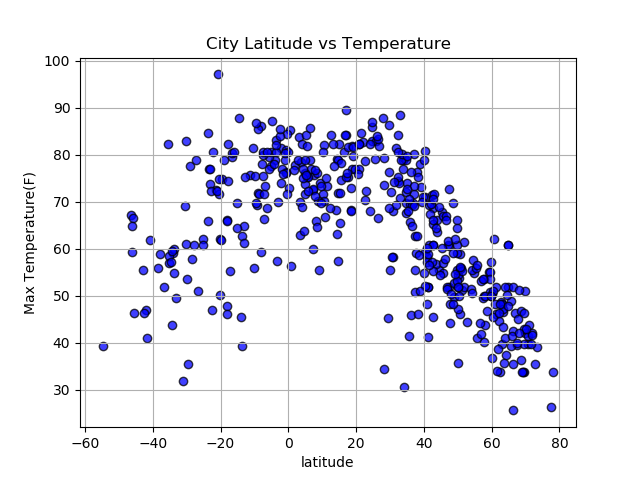

In [48]:
# Plot results for latitude vs temperature 
%matplotlib notebook
fig = plt.figure()
latitude = cities_df["city_lat"].values
temperature = cities_df["temperature"].values

temperature = plt.scatter(latitude, temperature , marker='o', facecolors="blue", edgecolors="black", alpha=0.75, 
                          label="Temperature")
from datetime import datetime
#currentDate = cities_df["Date"][0]
#date = datetime.utcfromtimestamp(currentDate).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Temperature')
plt.xlabel("latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.show()        

<IPython.core.display.Javascript object>


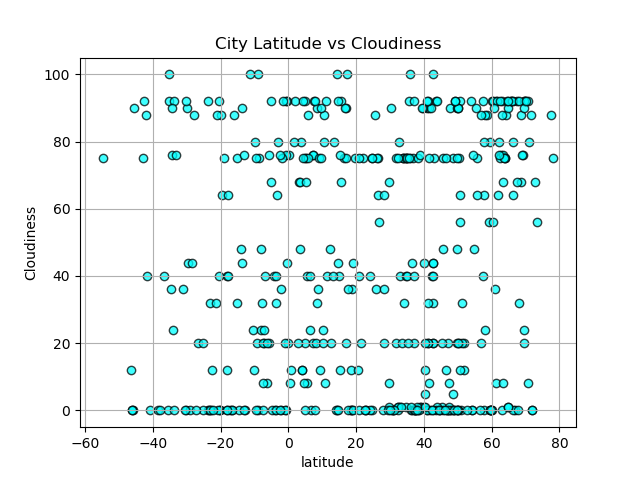

In [52]:
# plot results for latitude vs cloudiness
%matplotlib notebook
fig = plt.figure()
latitude = cities_df["city_lat"].values
cloudiness = cities_df["Cloudiness"].values

cloudiness = plt.scatter(latitude, cloudiness , marker='o', facecolors="aqua", edgecolors="black", alpha=0.75, 
                          label="Cloudiness")
from datetime import datetime
#currentDate = cities_df["Date"][0]
#date = datetime.utcfromtimestamp(currentDate).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Cloudiness')
plt.xlabel("latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


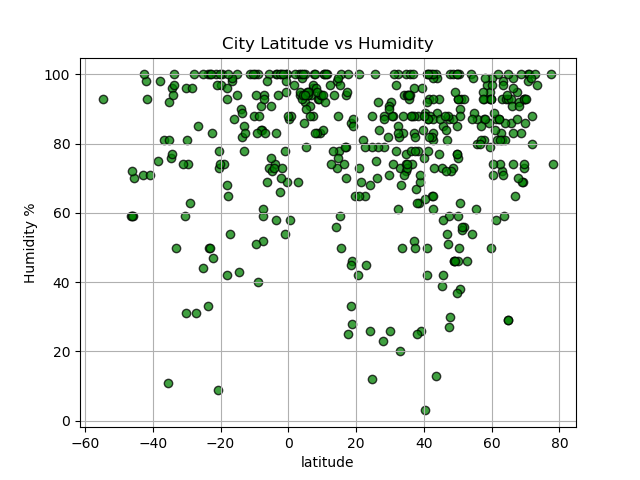

In [51]:
# Plot results for latitude vs humidity 
%matplotlib notebook
fig = plt.figure()
latitude = cities_df["city_lat"].values
humidity = cities_df["Humidity"].values

humidity = plt.scatter(latitude, humidity , marker='o', facecolors="green", edgecolors="black", alpha=0.75, 
                          label="Temperature")
from datetime import datetime
#currentDate = cities_df["Date"][0]
#date = datetime.utcfromtimestamp(currentDate).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Humidity')
plt.xlabel("latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.show()   

<IPython.core.display.Javascript object>


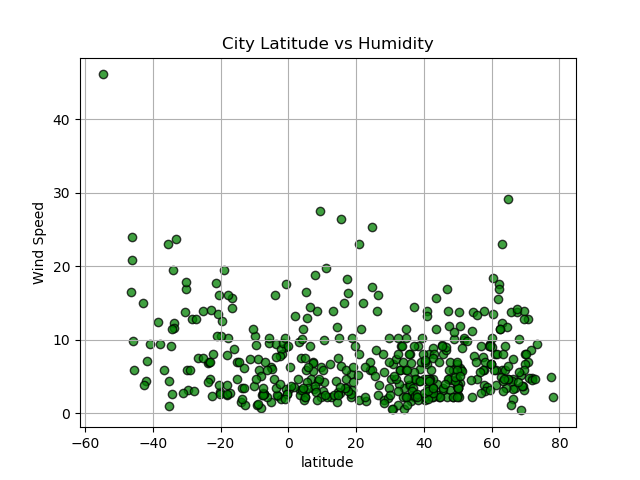

In [56]:
# Plot results for latitude vs wind speed 
%matplotlib notebook
fig = plt.figure()
latitude = cities_df["city_lat"].values
wind = cities_df["Wind"].values

wind = plt.scatter(latitude, wind, marker='o', facecolors="green", edgecolors="black", alpha=0.75, 
                          label="Wind")
from datetime import datetime
#currentDate = cities_df["Date"][0]
#date = datetime.utcfromtimestamp(currentDate).strftime('%Y-%m-%d')
plt.title(f'City Latitude vs Humidity')
plt.xlabel("latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.show()   